# Project 1 Description
Simple Aircraft Fuel Estimator
Goal: Estimate fuel needed based on flight duration.
1. Create a dataset with flight time (hours) and fuel used (gallons).
2. Use linear regression to find a simple pattern.
3. Train a model with flight-time vs. fuel data.
4. Predict fuel usage for a given flight time.
5. Allow the user to input flight duration.
6. Print the estimated fuel needed

## Dataset Info
I suprisingly had difficulty finding open flight data that had 'Fuel Consumed'. There were multiple datasets with flight duration, but never had data regarding the fuel consumption. That was until I stumbled upon this *Flight Fuel Analysis* on Kaggle where this man uses a robust, sensor-filled flight dataset with no real indicator from where he got it from.

**Kaggle Link for Dataset**: https://www.kaggle.com/code/venkateshyeturi/aircraft-fuel-analysis/input

### Available features and their description
- ACID: Aircraft identification or registration number.

- Flight_instance_ID: Unique identifier for each flight instance or record.

- Year, Month, Day, Hour, Minute, Second: Timestamp information for the flight event.

- ABRK: Represents the status of the autobrake system (e.g., Armed or Disarmed).

- ELEV_1, ELEV_2: Elevation information from two different sensors or sources.

- EVNT: Records specific events or incidents during the flight.

- FADF, FADS, FGC3: Different sensors or systems related to flight data and control.

- FIRE_1, FIRE_2, FIRE_3, FIRE_4: Fire-related sensors or indicators from different locations on the aircraft.

- FLAP: Indicates the position of the aircraft's flaps during the flight.

- FQTY_1, FQTY_2, FQTY_3, FQTY_4: Fuel quantity measurements from different fuel tanks.

- GLS, GPWS, HDGS, HF1, HF2, HYDG, HYDY, ILSF, LATP, LMOD, LOC, LONP: Various sensors or systems related to flight navigation and control.

- MNS, MRK, MW: Miscellaneous data points or measurements.

- N1CO, OIPL, OIT_1, OIT_2, OIT_3, OIT_4: Engine and oil temperature-related data.

- PACK, PH, POVT, PTRM, PUSH, SAT, SMKB, SMOK, SNAP, SPLG, SPLY, SPL_1, SPL_2, TAI, TAT, TCAS, TMAG, TMODE: Various aircraft systems or indicators.

- VHF1, VHF2, VHF3, VMODE, VSPS, WAI_1, WAI_2: Communication and weather-related data.

- APUF_Mean, APUF_Min, APUF_Max: Mean, Minimum, and Maximum values of certain parameters (e.g., Air Pressure Under Fuselage).

- CCPC_Mean, CCPC_Min, CCPC_Max, CCPF_Mean, CCPF_Min, CCPF_Max, CWPC_Mean, CWPC_Min, CWPC_Max, CWPF_Mean, CWPF_Min, CWPF_Max: Mean, Minimum, and Maximum values for different parameters related to the aircraft's systems or performance.

- MSQT_1_Mean, MSQT_1_Min, MSQT_1_Max, MSQT_2_Mean, MSQT_2_Min, MSQT_2_Max: Mean, Minimum, and Maximum values for various measurements (e.g., Mean Squared Quiver 1, 2).

- PI_Mean, PI_Min, PI_Max, PS_Mean, PS_Min, PS_Max, PSA_Mean, PSA_Min, PSA_Max, PT_Mean, PT_Min, PT_Max: Mean, Minimum, and Maximum values for different pressure-related parameters.

- RUDD_Mean, RUDD_Min, RUDD_Max, RUDP_Mean, RUDP_Min, RUDP_Max, SHKR_Mean, SHKR_Min, SHKR_Max: Mean, Minimum, and Maximum values for various sensor data (e.g., Rudder, Rudd Pedal).

- TOCW_Mean, TOCW_Min, TOCW_Max: Mean, Minimum, and Maximum values for Takeoff Configuration Warning data.

- ALT_Mean, ALT_Min, ALT_Max, ALTR_Mean, ALTR_Min, ALTR_Max: Mean, Minimum, and Maximum values for altitude-related parameters.

- AOA1_Mean, AOA1_Min, AOA1_Max, AOA2_Mean, AOA2_Min, AOA2_Max, AOAC_Mean, AOAC_Min, AOAC_Max, AOAI_Mean, AOAI_Min, AOAI_Max: Mean, Minimum, and Maximum values for Angle of Attack and related measurements.

- BAL1_Mean, BAL1_Min, BAL1_Max, BAL2_Mean, BAL2_Min, BAL2_Max: Mean, Minimum, and Maximum values for balance-related data.

- CAS_Mean, CAS_Min, CAS_Max, CASM_Mean, CASM_Min, CASM_Max: Mean, Minimum, and Maximum values for calibrated airspeed measurements.

- DA_Mean, DA_Min, DA_Max, GS_Mean, GS_Min, GS_Max, LATG_Mean, LATG_Min, LATG_Max, LONG_Mean, LONG_Min, LONG_Max: Mean, Minimum, and Maximum values for various measurements related to aircraft navigation and performance.

- MACH_Mean, MACH_Min, MACH_Max, MH_Mean, MH_Min, MH_Max, N1T_Mean, N1T_Min, N1T_Max: Mean, Minimum, and Maximum values for Mach number, magnetic heading, and other parameters.

- NSQT_Mean, NSQT_Min, NSQT_Max, TAS_Mean, TAS_Min, TAS_Max, TH_Mean, TH_Min, TH_Max, TRK_Mean, TRK_Min, TRK_Max, TRKM_Mean, TRKM_Min, TRKM_Max: Mean, Minimum, and Maximum values for various speed, temperature, and tracking measurements.

- VIB_1_Mean, VIB_1_Min, VIB_1_Max: Mean, Minimum, and Maximum values for vibration-related data.

- WD_Mean, WD_Min, WD_Max, WS_Mean, WS_Min, WS_Max: Mean, Minimum, and Maximum values for wind direction and speed.

- RALT_Mean, RALT_Min, RALT_Max, ROLL_Mean, ROLL_Min, ROLL_Max, VRTG_Mean, VRTG_Min, VRTG_Max: Mean, Minimum, and Maximum values for various measurements related to altitude, roll, and vertical acceleration.

- CTAC_Mean, CTAC_Min, CTAC_Max, FPAC_Mean, FPAC_Min, FPAC_Max, IVV_Mean, IVV_Min, IVV_Max: Mean, Minimum, and Maximum values for various parameters related to aircraft control and performance.

- ACMT, AIL_1, AIL_2, ALTS, APFD, A_T, BLV, BPGR_1, BPGR_2, BPYR_1, BPYR_2, CALT, CASS, CRSS, DFGS, DWPT, EAI, FF: Miscellaneous data points or measurements.

In [62]:
# Importing needed libaries
import pandas as pd #for data processing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import model_selection

In [2]:
# Saving Path for Dataset
path = "CAX_Train_1"
files = os.listdir(path)

In [3]:
# combining all dataframes together
set_of_all_dataframes = [pd.read_csv(os.path.join(path,file))  for file in files]
first_instance = set_of_all_dataframes[0]
combined_df = pd.concat(set_of_all_dataframes, ignore_index = True)

In [32]:
print(f"Dataset Shape: {combined_df.shape}")
combined_df.head()

Dataset Shape: (1074612, 226)


,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
0,676,676200406231710,2004,6,23,17,9,12,119.983559,20.149113,...,29.296949,48.828247,0.0,0,134.0,5.97652,1,32904,0,0
1,676,676200406231710,2004,6,23,17,9,13,119.983559,20.149113,...,29.296949,53.711075,0.0,0,134.0,5.97652,1,32904,0,0
2,676,676200406231710,2004,6,23,17,9,14,119.983559,20.149113,...,29.296949,48.828247,0.0,0,134.0,5.97652,1,32904,0,0
3,676,676200406231710,2004,6,23,17,9,15,119.983559,20.169571,...,29.296949,48.828247,0.0,0,134.0,5.97652,1,32904,0,0
4,676,676200406231710,2004,6,23,17,9,16,119.983559,20.169571,...,29.296949,48.828247,0.0,0,134.0,5.97652,1,32904,0,0


In [29]:
print(f"Number fo Unique Aircrafts: {combined_df["ACID"].nunique()}")
print(f"Number of Unique Flights : {combined_df['Flight_instance_ID'].nunique()}")

Number fo Unique Aircrafts: 1
Number of Unique Flights : 200


### As we can see from the outputs above, this dataset follows one plane for 200 different flights.

## Preprocessing

The next step in this project is to only include the needed data from the project description:
- Flight Time (hours)
- Fuel Used (gallons)

### Calculating Duration for Each Flight

In [42]:

# Combine date and time columns into a single datetime column
combined_df["timestamp"] = pd.to_datetime(combined_df[["Year", "Month", "Day", "Hour", "Minute", "Second"]])

# Calculate flight duration for each flight instance
flight_time_seconds = combined_df.groupby("Flight_instance_ID")["timestamp"].agg(lambda x: (x.max() - x.min()).total_seconds())

flight_time_hours = flight_time_seconds/3600
print(flight_time_hours)


Flight_instance_ID
676200405111519    1.211944
676200405112006    2.230833
676200405121212    1.187500
676200405121402    1.060833
676200405121539    1.116389
                     ...   
676201003121527    2.621944
676201003121944    1.625278
676201003140736    1.147500
676201003141127    1.686389
676201003141639    1.696389
Name: timestamp, Length: 200, dtype: float64


### Calculating Fuel Consumed For Each Flight

In [47]:
# Since we have 4 Sensors for Fuel consumption (one for each engine), we are first going to combine them

# Adding the Fuel Sensors from all 4 Engines
combined_df['Total_Fuel'] = combined_df[['FQTY_1', 'FQTY_2', 'FQTY_3', 'FQTY_4']].sum(axis=1)

# Compute fuel consumption per flight
fuel_consumed = combined_df.groupby("Flight_instance_ID").agg(
    initial_fuel=("Total_Fuel", "first"),
    final_fuel=("Total_Fuel", "last")
)

fuel_consumed["Fuel_Used"] = fuel_consumed["initial_fuel"] - fuel_consumed["final_fuel"]

print(fuel_consumed)



                    initial_fuel  final_fuel  Fuel_Used
Flight_instance_ID                                     
676200405111519            13032        7856       5176
676200405112006            20792       11112       9680
676200405121212            14992        9880       5112
676200405121402            11944        7312       4632
676200405121539            11856        6680       5176
...                          ...         ...        ...
676201003121527            21000        9144      11856
676201003121944            20560       13328       7232
676201003140736            18720       13480       5240
676201003141127            15248        8104       7144
676201003141639            20168       12392       7776

[200 rows x 3 columns]


In [58]:
# Combining Fuel Consumed + Flight Duration
processed_df = pd.concat([fuel_consumed, flight_time_hours], axis=1)

processed_df.rename(columns={'timestamp': 'Flight_Duration'}, inplace=True)

processed_df.drop(columns=["initial_fuel", "final_fuel"], inplace=True)

print(processed_df)

                    Fuel_Used  Flight_Duration
Flight_instance_ID                            
676200405111519          5176         1.211944
676200405112006          9680         2.230833
676200405121212          5112         1.187500
676200405121402          4632         1.060833
676200405121539          5176         1.116389
...                       ...              ...
676201003121527         11856         2.621944
676201003121944          7232         1.625278
676201003140736          5240         1.147500
676201003141127          7144         1.686389
676201003141639          7776         1.696389

[200 rows x 2 columns]


In [63]:
# Creating Train/Test/Val Split

# Features (x) - Everything except 'Fuel_Used' (Target)
X = processed_df.drop(columns=["Fuel_Used"])

# Target Variable (y) - 'Fuel_Used'
y = processed_df["Fuel_Used"]

# Split into Train (70%), Temp (30%) - Temp will be split into Val & Test
X_train, X_temp, y_train, y_temp = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Split Temp into Validation (50% of Temp) and Test (50% of Temp)
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (140, 1) (140,)
Validation set: (30, 1) (30,)
Test set: (30, 1) (30,)


## Training Model

In [65]:
from sklearn import linear_model
from sklearn import metrics


In [80]:
model = linear_model.LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [81]:
# Evaluate the model
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
mae = metrics.mean_absolute_error(y_val, y_val_pred)
mse = metrics.mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

# Print evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 509.64
MSE: 392412.51
RMSE: 626.43


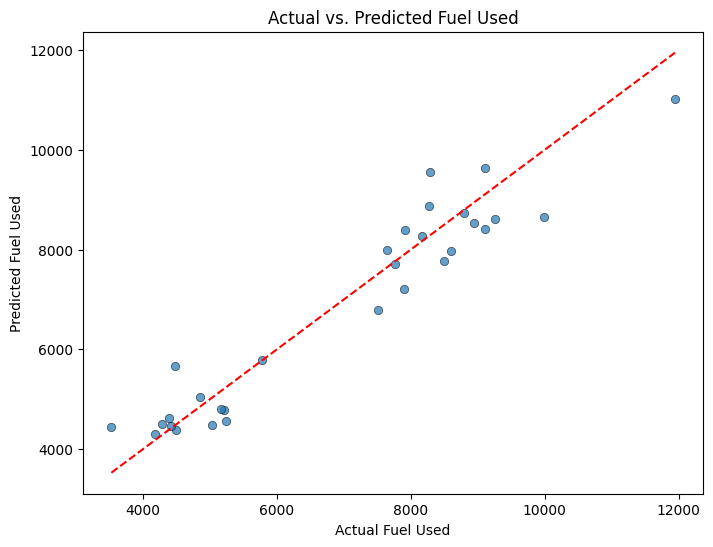

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.7, edgecolor="k")

# Plot ideal predictions (y = x line)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], "r--")

# Labels and title
plt.xlabel("Actual Fuel Used")
plt.ylabel("Predicted Fuel Used")
plt.title("Actual vs. Predicted Fuel Used")
plt.show()


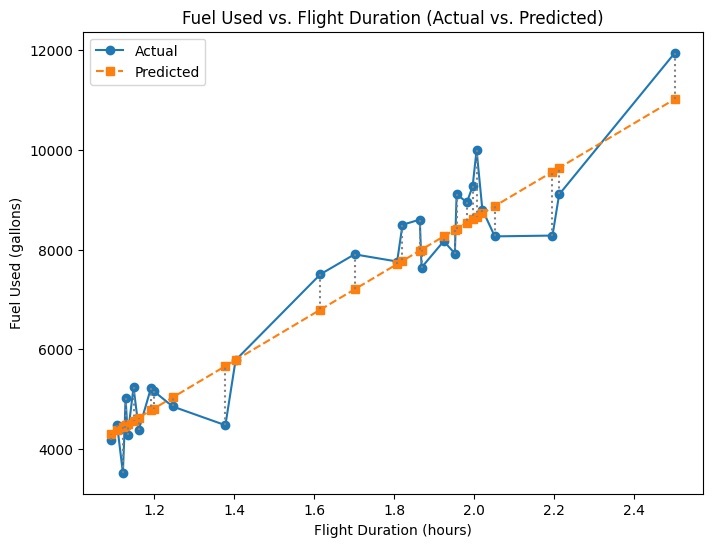

In [91]:

# Sorting data by flight duration for visualization
X_val_sorted = X_val.copy()
X_val_sorted["Fuel Used"] = y_val
X_val_sorted = X_val_sorted.sort_values(by="Flight_Duration")

# Predicting fuel usage for sorted data
y_sorted_pred = model.predict(X_val_sorted.drop(columns=["Fuel Used"]))

# Line plot
plt.figure(figsize=(8, 6))
plt.plot(X_val_sorted["Flight_Duration"], X_val_sorted["Fuel Used"], label="Actual", marker="o")
plt.plot(X_val_sorted["Flight_Duration"], y_sorted_pred, label="Predicted", linestyle="--", marker="s")

# Add vertical lines to show distance between actual and predicted values
for i in range(len(X_val_sorted)):
    plt.plot([X_val_sorted["Flight_Duration"].iloc[i], X_val_sorted["Flight_Duration"].iloc[i]], 
             [X_val_sorted["Fuel Used"].iloc[i], y_sorted_pred[i]], 
             color="gray", linestyle="dotted")

# Labels and legend
plt.xlabel("Flight Duration (hours)")
plt.ylabel("Fuel Used (gallons)")
plt.title("Fuel Used vs. Flight Duration (Actual vs. Predicted)")
plt.legend()
plt.show()


## Final Evaluation Against Test Set

Mean Absolute Error (MAE): 587.4978531896003
Mean Squared Error (MSE): 833305.1232669594
Root Mean Squared Error (RMSE): 912.8554777548084
R-squared (R2): 0.8053587984614803


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


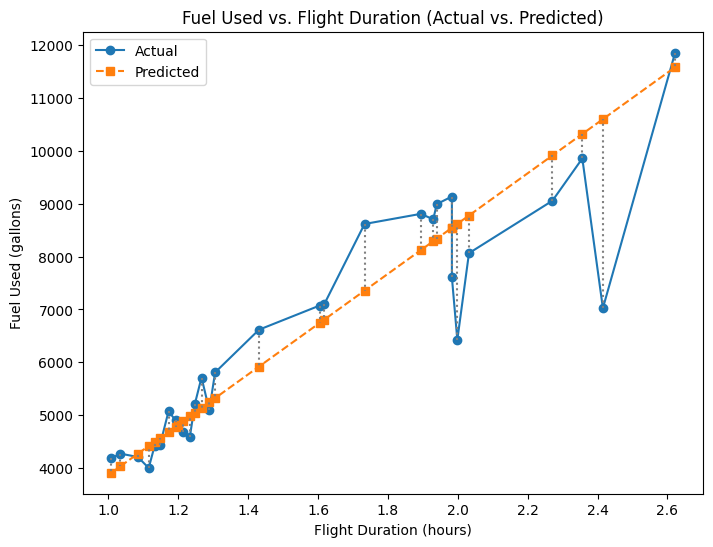

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Sorting data by flight duration for visualization
X_test_sorted = X_test.copy()
X_test_sorted["Fuel Used"] = y_test
X_test_sorted = X_test_sorted.sort_values(by="Flight_Duration")

# Predicting fuel usage for sorted data
y_sorted_pred = model.predict(X_test_sorted.drop(columns=["Fuel Used"]))

# Line plot
plt.figure(figsize=(8, 6))
plt.plot(X_test_sorted["Flight_Duration"], X_test_sorted["Fuel Used"], label="Actual", marker="o")
plt.plot(X_test_sorted["Flight_Duration"], y_sorted_pred, label="Predicted", linestyle="--", marker="s")

# Add vertical lines to show distance between actual and predicted values
for i in range(len(X_test_sorted)):
    plt.plot([X_test_sorted["Flight_Duration"].iloc[i], X_test_sorted["Flight_Duration"].iloc[i]], 
             [X_test_sorted["Fuel Used"].iloc[i], y_sorted_pred[i]], 
             color="gray", linestyle="dotted")

# Labels and legend
plt.xlabel("Flight Duration (hours)")
plt.ylabel("Fuel Used (gallons)")
plt.title("Fuel Used vs. Flight Duration (Actual vs. Predicted)")
plt.legend()
plt.show()


## User Test: Insert Flight Length in Hours

In [86]:
import numpy as np

# Function to predict fuel usage based on flight duration
def predict_fuel_usage(flight_duration):
    input_data = np.array([[flight_duration]])

    predicted_fuel = model.predict(input_data)

    return predicted_fuel[0]

# Example of user input and prediction
flight_duration_input = float(input("Enter flight duration in hours: "))  # User inputs flight duration
predicted_fuel = predict_fuel_usage(flight_duration_input)

print(f"Predicted fuel usage for {flight_duration_input} hours flight duration: {predicted_fuel:.2f} gallons")


Predicted fuel usage for 3.0 hours flight duration: 13379.55 gallons


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Closing Thoughts

Overall, the model's performance was pretty average. The final MAE score was ~588 which means that the average prediction was off by about 588 gallons. Looking at the graph though, most of the predictions below 1.5 hours were very accurate, while those above 2 hours were much more innacurate due to the high variance.

This all makes sense since the longer a flight goes on, the more outside variables such as weather, wind, cargo weight, etc. start to become important factors. 

If the goal was to make the most accurate model with no limit of input features, I would have certainly used more of the features in this dataset such as Altitude, Location, Weather Sensors, etc., but for the simplicity of this project, I would say the output is relatively decent.

One of my main qualms with the Dataset is that it does not include the type of plane we are tracking, so I cannot make a final deliberation between a random user-inputed time in hours and an actual average for a plane of the same type. Either way, I have some examples of that below

In [94]:
flight_duration_input = 2.5 # User inputs flight duration
predicted_fuel = predict_fuel_usage(flight_duration_input)

print(f"Predicted fuel usage for {flight_duration_input} hours flight duration: {predicted_fuel:.2f} gallons")
print(f"Other Modern Day 4-Engine Commercial Airliners Fuel Consumption:")
print(f"Airbus A340: ~10000 gallons over 2.5 hours")
print(f"Boeing 757-8: ~9500 gallons over 2.5 hours")

Predicted fuel usage for 2.5 hours flight duration: 11002.09 gallons
Other Modern Day 4-Engine Commercial Airliners Fuel Consumption:
Airbus A340: ~10000 gallons over 2.5 hours
Boeing 757-8: ~9500 gallons over 2.5 hours


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
